In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy import optimize

In [34]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_name = '2017_11_29_19_11_20_op-time-scan-high-power'
exp_date = '_'.join(exp_name.split('_')[:3])
experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
cuts = [[22],[3]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
q.set_thresholds(cuts)

name 'fort_exp' is not defined


In [35]:
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

In [36]:
retention = q.apply_thresholds()

In [37]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.00	retention:0.802 +- 0.033
ivar:	0.04	retention:0.188 +- 0.033
ivar:	0.08	retention:0.040 +- 0.016
ivar:	0.12	retention:0.109 +- 0.026
ivar:	0.16	retention:0.099 +- 0.025
ivar:	0.20	retention:0.119 +- 0.027
ivar:	0.24	retention:0.079 +- 0.023
ivar:	0.28	retention:0.129 +- 0.028
ivar:	0.32	retention:0.228 +- 0.035
ivar:	0.36	retention:0.120 +- 0.027
ivar:	0.40	retention:0.168 +- 0.031


In [38]:
q.save_experiment_data()

In [39]:
def expon(x, a, tau, b):
    return b + a*np.exp(-x/tau)

<IPython.core.display.Javascript object>


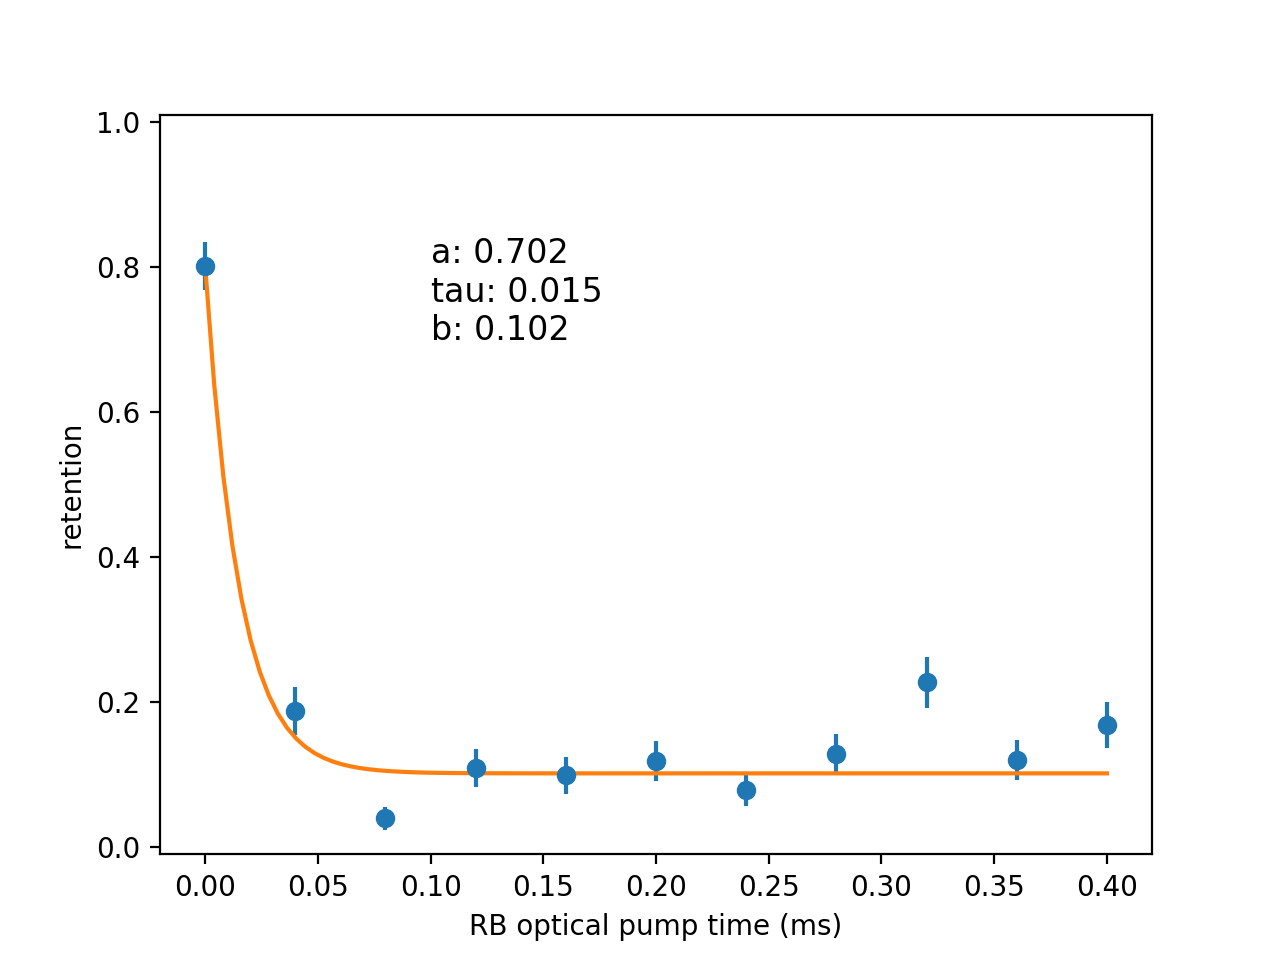

[ 0.70152249  0.01506968  0.10180815]


In [40]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'o'
    )
ax.set_ylim(-0.01, 1.01)
ax.set_xlabel(xlab)

guess = [0.8, 0.03, 0]
for e in range(len(retention['ivar'])):
    popt, pcov = optimize.curve_fit(
        expon,
        retention['ivar'][e],
        retention['retention'][e],
        p0=guess,
        sigma=retention['error'][e]
    )
    xs = np.linspace(min(retention['ivar'][e]),max(retention['ivar'][e]),100)
    ax.plot(xs, expon(xs, *popt))
    fit_data = "a: {:.3f}\ntau: {:.3f}\nb: {:.3f}"
    ax.text(0.1, 0.7, fit_data.format(*popt), fontsize=12)

ax.set_ylabel('retention')
print(popt)
fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'exponential_retention_fit.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

In [33]:
popt[1]

0.015069682069044913